In [ ]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Loading the MNIST dataset using TensorFlow Datasets
ds_train, ds_info = tfds.load('mnist', split='train', as_supervised=True, with_info=True)

# Convert dataset to numpy arrays
train_images = np.array([example[0].numpy() for example in ds_train])
train_labels = np.array([example[1].numpy() for example in ds_train])

# Display some images from the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

# We reshape the images to 28x28 and scale the pixel values to [0, 1]
train_images_cnn = train_images.reshape(-1, 28, 28, 1) / 255.0
train_images_svm = train_images.reshape(-1, 28 * 28) / 255.0

# Split the training data into training and validation sets
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(train_images_cnn, train_labels, test_size=0.1, random_state=42)
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(train_images_svm, train_labels, test_size=0.1, random_state=42)

# Defining the CNN model architecture
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=64, validation_data=(X_val_cnn, y_val_cnn))

# Define and train the SVM model
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train_svm, y_train_svm)

# Predict labels for validation set using SVM
y_pred_svm = svm_model.predict(X_val_svm)

# Calculate accuracy of SVM model
accuracy_svm = accuracy_score(y_val_svm, y_pred_svm)
print("Validation Accuracy of SVM:", accuracy_svm)


Epoch 1/3
3780/3780 [==============================] - 54s 14ms/step - loss: 0.3901 - accuracy: 0.8802 - val_loss: 0.1508 - val_accuracy: 0.9524
Epoch 2/3
3780/3780 [==============================] - 48s 13ms/step - loss: 0.1018 - accuracy: 0.9673 - val_loss: 0.1077 - val_accuracy: 0.9671
Epoch 3/3
3780/3780 [==============================] - 50s 13ms/step - loss: 0.0705 - accuracy: 0.9780 - val_loss: 0.0760 - val_accuracy: 0.9755


NameError: name 'test_labels' is not defined

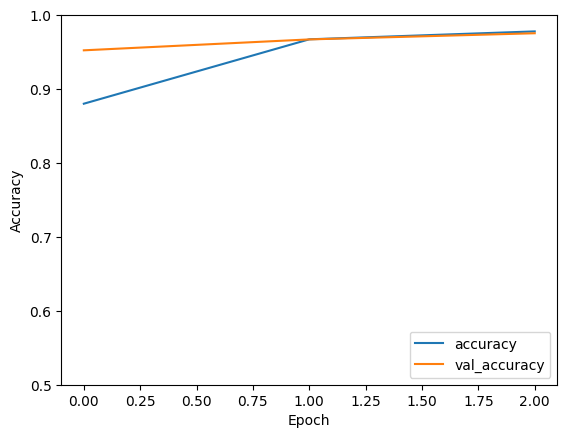

In [ ]:
#Ignore this for now
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


#Read training data from Kaggle dataset
train = pd.read_csv('/content/drive/MyDrive/SOFE4620_MachineLearning/Project/train.csv')
#Read test data from Kaggle dataset
test = pd.read_csv('/content/drive/MyDrive/SOFE4620_MachineLearning/Project/test.csv')

#Set y train to get all the values from the label column
y_train = train["label"]

#Set x train to get all pixel values (ignore the label column)
x_train = train.iloc[:, 1:]

#Normalize the data
x_train = x_train / 255.0
test = test / 255.0

#Reshape data
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

#Represent the label as a one-hot vector
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]

# Split the training data into training and validation sets
x_train_cnn, x_val_cnn, y_train_cnn, y_val_cnn = train_test_split(x_train, y_train, test_size=0.1, random_state=2)

# Defining the CNN model architecture
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Define model parameters
optimizer = SGD(learning_rate=0.01)
epochs = 10
batch_size = 3


cnn_model.compile(optimizer = optimizer , loss = "categorical_crossentropy",  metrics=['accuracy'])


# Train the CNN model
history = cnn_model.fit(x_train_cnn, y_train_cnn, epochs, batch_size, validation_data=(x_val_cnn, y_val_cnn))


